<a href="https://colab.research.google.com/github/MelMacLondon/ML/blob/main/ExplainabilityVsInterpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


n = 100
np.random.seed(12345)

data = pd.DataFrame(
    {
        "Age": np.random.randint(30, 90, n),
        "Cholesterol": np.random.uniform(4.0, 7.5, n),
        "Blood_Pressure": np.random.randint(110, 160, n),
        "Smoking_Status": np.random.randint(0, 2, n),
        "Physical_Activity": np.random.randint(0, 14, n),
    }
)

data["score"] = (
    0.04 * data.Age
    + 0.07 * data.Cholesterol
    + 0.05 * data.Blood_Pressure
    + 1.2 * data.Smoking_Status
    - 0.1 * data.Physical_Activity
)
data.score = data.score + np.random.normal(0, 1, n)
data.score = data.score.clip(lower=0)
data.score = data.score / data.score.max()
mean_score = data.score.mean()
data["Heart_Disease"] = data.apply(
    lambda row: 1 if row["score"] < mean_score else 0,
    axis=1,
)
data = data.drop(columns=["score"])

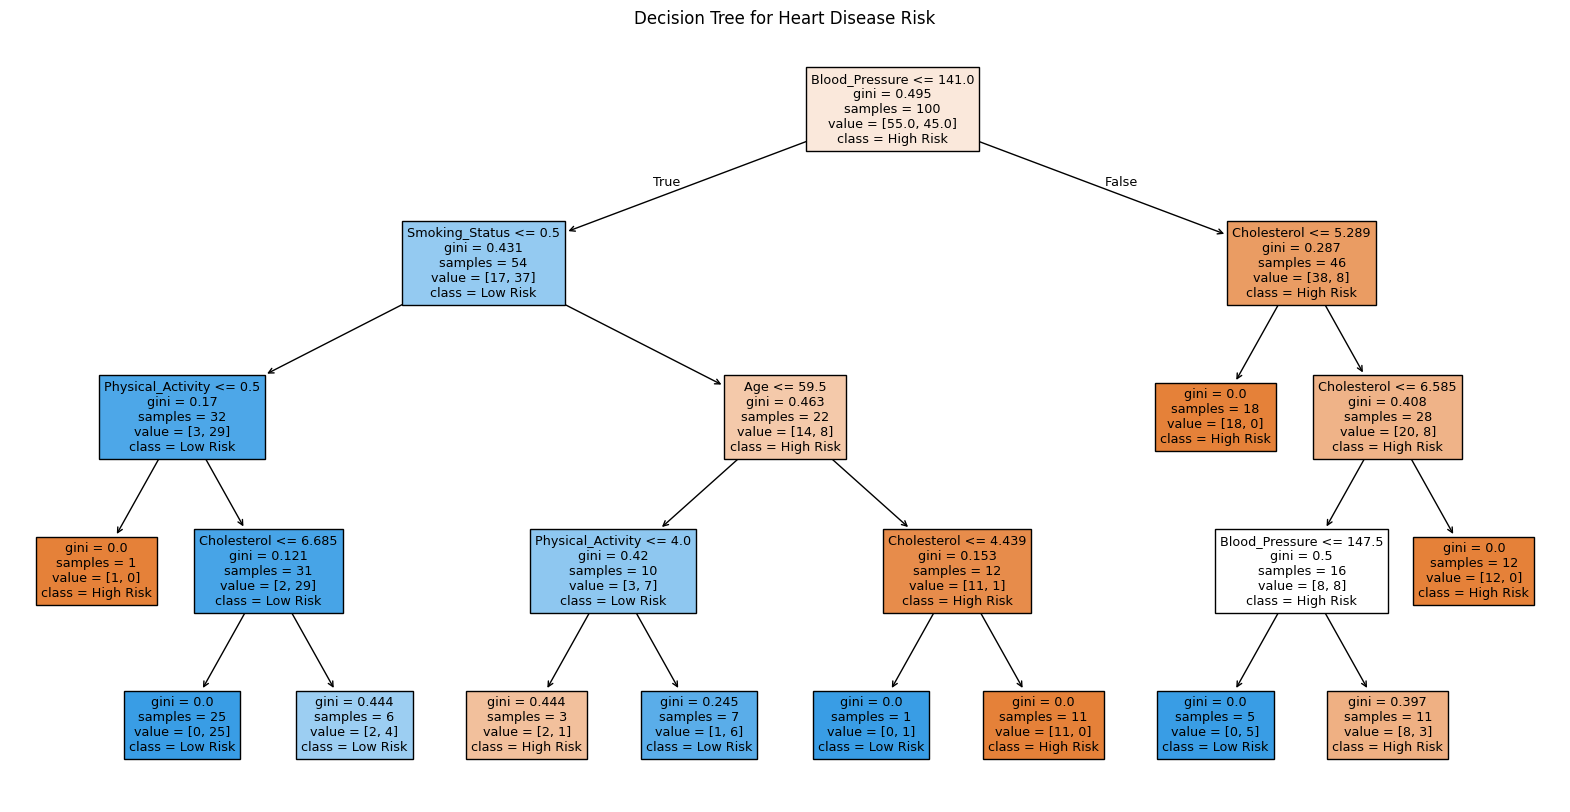

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


X = data[
    ["Age", "Cholesterol", "Blood_Pressure", "Smoking_Status", "Physical_Activity"]
]
y = data["Heart_Disease"]

clf = DecisionTreeClassifier(max_depth=4, random_state=12345)
clf.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(
    clf, feature_names=X.columns, class_names=["High Risk", "Low Risk"], filled=True
)
plt.title("Decision Tree for Heart Disease Risk")
plt.show()

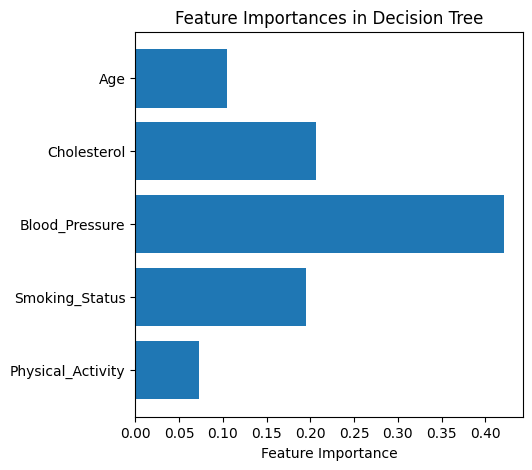

In [4]:
## FEATURE IMPORTANCE

importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(5, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Decision Tree")
plt.gca().invert_yaxis()
plt.show()